## Iris Classification

In [1]:
#importing libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# training a logistic regression model and then predicting y values
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
# accuracy of this model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Logistic Regression: {accuracy:.2f}")

Accuracy using Logistic Regression: 1.00


In [7]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

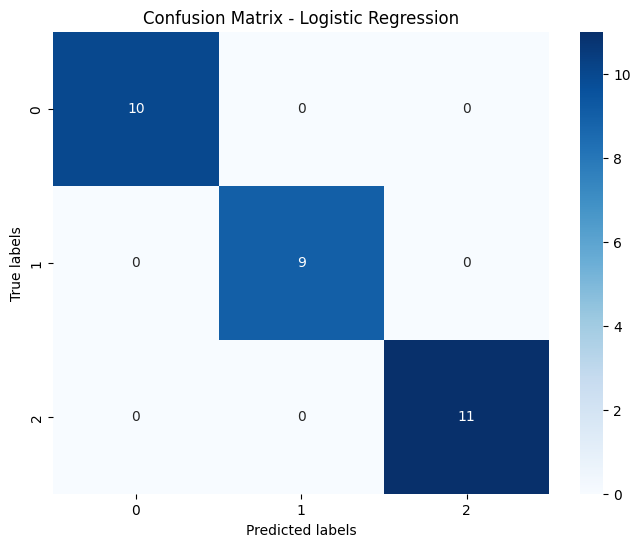

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions using the logistic regression model
y_pred_lr = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [10]:
#now, using TensorFlow for Iris Classification

#importing libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history=model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
3/3 [==============================] - 2s 220ms/step - loss: 1.1713 - accuracy: 0.3542 - val_loss: 1.1156 - val_accuracy: 0.2917
Epoch 2/50
3/3 [==============================] - 0s 42ms/step - loss: 1.1418 - accuracy: 0.3542 - val_loss: 1.0989 - val_accuracy: 0.2917
Epoch 3/50
3/3 [==============================] - 0s 71ms/step - loss: 1.1181 - accuracy: 0.3542 - val_loss: 1.0827 - val_accuracy: 0.2917
Epoch 4/50
3/3 [==============================] - 0s 41ms/step - loss: 1.0944 - accuracy: 0.3542 - val_loss: 1.0671 - val_accuracy: 0.2917
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 1.0723 - accuracy: 0.3542 - val_loss: 1.0522 - val_accuracy: 0.2917
Epoch 6/50
3/3 [==============================] - 0s 59ms/step - loss: 1.0526 - accuracy: 0.3542 - val_loss: 1.0376 - val_accuracy: 0.2917
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 1.0325 - accuracy: 0.3542 - val_loss: 1.0236 - val_accuracy: 0.2917
Epoch 8/50
3/3 [==========

In [13]:
# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy using TensorFlow: {accuracy:.2f}")

1/1 [==============================] - 0s 170ms/step - loss: 0.3364 - accuracy: 0.9333
Accuracy using TensorFlow: 0.93


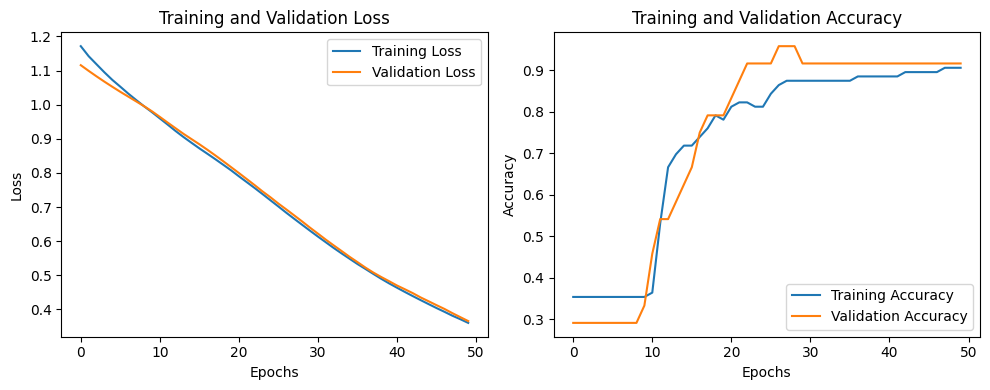

In [14]:
# Plotting training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
